In [12]:
import os
import glob
import pandas as pd

# 텍스트 파일이 들어있는 폴더 경로 설정
folder_path = "./600K"

# 폴더 내의 모든 텍스트 파일 가져오기
file_paths = glob.glob(os.path.join(folder_path, "zaxis*"))

# 각 파일을 읽어서 리스트에 추가
dfs = []

for file_path in file_paths:
    df = pd.read_csv(file_path, skiprows=2, sep=' ', index_col=None, header=None)
    df.drop(int(0), axis=1, inplace=True)
    df.drop(int(2), axis=1, inplace=True)
    dfs.append(df)

# 리스트에 담긴 모든 DataFrame을 하나로 합치기
merged_df = pd.concat(dfs, axis=1)

# 결과 확인
print(merged_df)

            1          1          1          1          1          1  \
0    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
..        ...        ...        ...        ...        ...        ...   
92  27.808748  32.795306  28.802840  31.074905  32.644900  28.780261   
93  30.737392  18.659689  32.834287  24.720765  27.160848  33.079847   
94  30.168962  18.692950  31.380511  23.126176  27.708341  32.338309   
95  26.456966  31.321831  20.862922  26.961564  31.077148  20.833692   
96  25.797472  31.637259  21.406331  26.920612  30.308292  20.739618   

            1          1          1          1  ...          1          1  \
0    0.000000   0.000000   0.000000   0.000000  ...   0.00

/var/folders/4j/67_xfsx14zqdm2qbdv5vgxgw0000gn/T/ipykernel_882/72276482.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0f}'.format(x) for x in current_values])


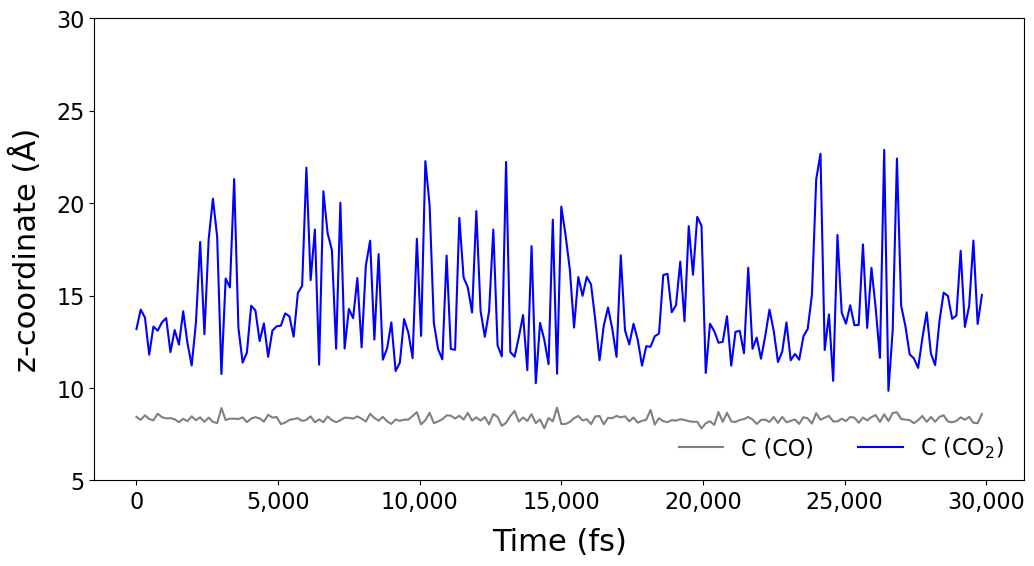

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = plt.gca()

numbers_list = [i for i in range(1, 30001, 150)]

c_co = (merged_df.iloc[36] + merged_df.iloc[38])/2
c_co2 = merged_df.iloc[37]

plt.plot(numbers_list, c_co, c="gray", label=r'C (CO)')
plt.plot(numbers_list, c_co2, c="blue", label=r'C (CO$_2$)')

current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.xlabel('Time (fs)', size=22, labelpad=10)
#plt.xlim(0,1.0)
plt.ylabel('z-coordinate (Å)', size=22, labelpad=10)
plt.ylim(0, 30000)
plt.ylim(5, 30)
plt.yticks(size=16)
plt.xticks(size=16)
plt.legend(loc=4, ncol=3, fontsize=16, frameon=False)
plt.show()
